In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("train.csv")
df_test  = pd.read_csv("test.csv")

In [371]:
df_test  = pd.read_csv("test.csv")

In [3]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Pritesh\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# EDA

In [10]:
columns = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area']

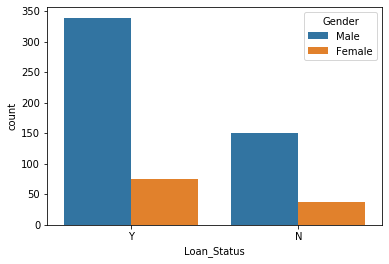

Male      489
Female    112
Name: Gender, dtype: int64 



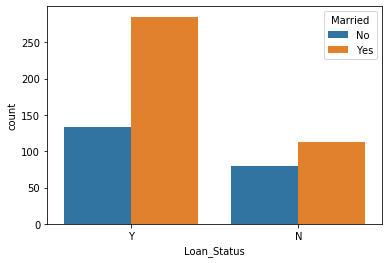

Yes    398
No     213
Name: Married, dtype: int64 



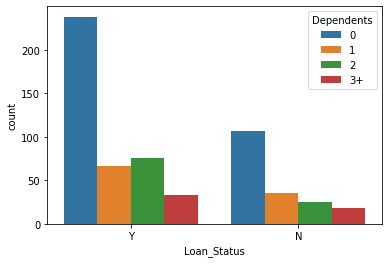

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64 



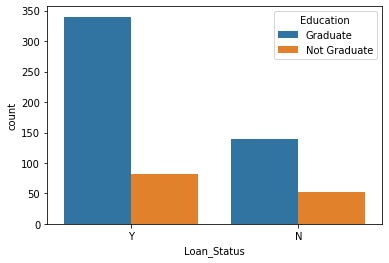

Graduate        480
Not Graduate    134
Name: Education, dtype: int64 



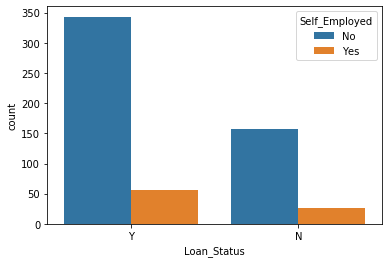

No     500
Yes     82
Name: Self_Employed, dtype: int64 



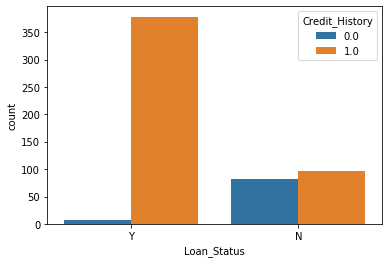

1.0    475
0.0     89
Name: Credit_History, dtype: int64 



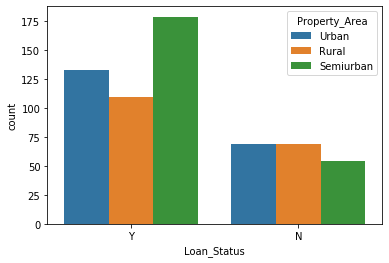

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64 



In [11]:
for column in columns:
    plt.figure()
    sns.countplot(df.Loan_Status, hue=df[column])
    plt.show()
    print(df[column].value_counts(), '\n')

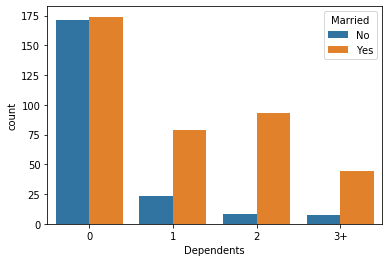

In [12]:
sns.countplot(df.Dependents, hue=df.Married)

Being married increases your chances of getting the loan and having credit history of 0 decreases it.

In [14]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']

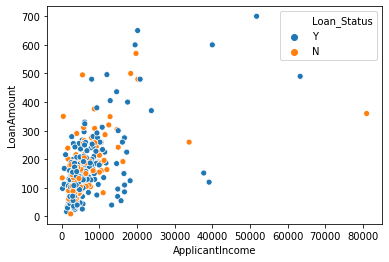

In [26]:
sns.scatterplot(df.ApplicantIncome, df.LoanAmount, hue=df.Loan_Status)

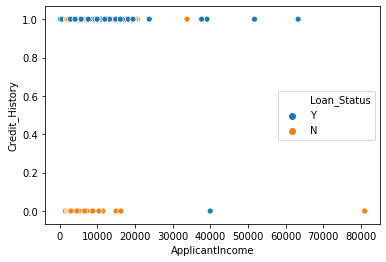

In [27]:
sns.scatterplot(df.ApplicantIncome, df.Credit_History, hue=df.Loan_Status)

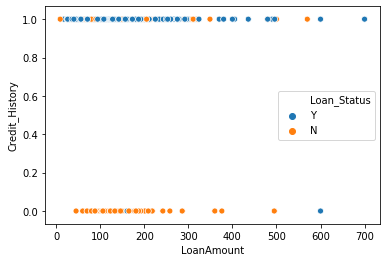

In [30]:
sns.scatterplot(df.LoanAmount, df.Credit_History, hue=df.Loan_Status)

# Cleaning

In [31]:
df.loc[df.isnull().any(axis=1)]


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,LP002933,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y


In [34]:
df.drop('Loan_ID', axis=1, inplace=True) 
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [38]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [44]:
na_columns = ['Gender', "Married", 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']
for na_column in na_columns:
    df[na_column].fillna(df[na_column].mode()[0], inplace=True)

In [47]:
df.LoanAmount.fillna(df.LoanAmount.median(), inplace=True)

In [48]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [74]:
df.Gender = (df.Gender == 'Male').astype(int)
df.Married = (df.Married == 'Yes').astype(int)
df.Self_Employed = (df.Self_Employed == 'Yes').astype(int)
df.Education = (df.Education == 'Graduate').astype(int)
df.Loan_Status = (df.Loan_Status == 'Y').astype(int)

In [73]:
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(5), int64(1), object(2)
memory usage: 45.7+ KB


In [183]:
dummies = pd.get_dummies(df)
dummies

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,1,0,5849,0.0,128.0,360.0,1.0,1,1,0,0,0,0,0,1
1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,1,0,0,1,0,0
2,1,1,1,1,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,0,1
3,1,1,0,0,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,0,0,1
4,1,0,1,0,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,1,0,2900,0.0,71.0,360.0,1.0,1,1,0,0,0,1,0,0
610,1,1,1,0,4106,0.0,40.0,180.0,1.0,1,0,0,0,1,1,0,0
611,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,0,1,0,0,0,0,1
612,1,1,1,0,7583,0.0,187.0,360.0,1.0,1,0,0,1,0,0,0,1


In [290]:
X = dummies.drop(['Loan_Status'], axis=1)
y = dummies.Loan_Status

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [338]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [202]:
log = LogisticRegression()
log.fit(X_train, y_train)

C:\Users\Pritesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [203]:
print(log.score(X_train, y_train))
print(log.score(X_test, y_test))

0.808695652173913
0.8181818181818182


In [204]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.8021739130434783
0.551948051948052


In [276]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
forest = RandomForestClassifier(n_estimators=100, max_depth=6, max_features=int(11**0.5))
forest.fit(X_train, y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [277]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.839
Accuracy on test set: 0.831


In [345]:
from sklearn.svm import SVC
svm = SVC(C=0.1, gamma=0.1).fit(X_train, y_train)

In [346]:
print("Accuracy on training set: {:.3f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svm.score(X_test, y_test)))

Accuracy on training set: 0.687
Accuracy on test set: 0.688


# Result

The best model on the trained data is the RandomForestCLassifier. <br>
Accuracy on training set: 0.839 <br>
Accuracy on test set: 0.83

Most important columns

In [363]:
X_train.columns[forest.feature_importances_.argmax()]

'Credit_History'

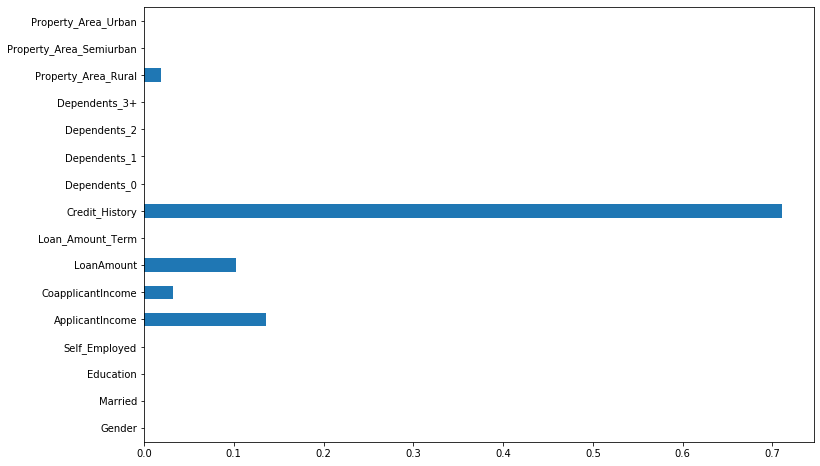

In [394]:
importances = pd.Series(tree.feature_importances_,index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

In [375]:
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [376]:
df_test.Gender = (df_test.Gender == 'Male').astype(int)
df_test.Married = (df_test.Married == 'Yes').astype(int)
df_test.Self_Employed = (df_test.Self_Employed == 'Yes').astype(int)
df_test.Education = (df_test.Education == 'Graduate').astype(int)
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,1,0,5720,0,110.0,360.0,1.0,Urban
1,LP001022,1,1,1,1,0,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,1,1,2,1,0,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,1,1,2,1,0,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,1,0,0,0,0,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3+,0,1,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,1,1,0,1,0,4158,709,115.0,360.0,1.0,Urban
364,LP002980,1,0,0,1,0,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,1,1,0,1,0,5000,2393,158.0,360.0,1.0,Rural


In [378]:
df_test.drop('Loan_ID', axis=1,inplace=True)
df_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,1,0,5720,0,110.0,360.0,1.0,Urban
1,1,1,1,1,0,3076,1500,126.0,360.0,1.0,Urban
2,1,1,2,1,0,5000,1800,208.0,360.0,1.0,Urban
3,1,1,2,1,0,2340,2546,100.0,360.0,NaN,Urban
4,1,0,0,0,0,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3+,0,1,4009,1777,113.0,360.0,1.0,Urban
363,1,1,0,1,0,4158,709,115.0,360.0,1.0,Urban
364,1,0,0,1,0,3250,1993,126.0,360.0,NaN,Semiurban
365,1,1,0,1,0,5000,2393,158.0,360.0,1.0,Rural


In [379]:
df_test = pd.get_dummies(df_test)
df_test

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,1,1,0,5720,0,110.0,360.0,1.0,1,0,0,0,0,0,1
1,1,1,1,0,3076,1500,126.0,360.0,1.0,0,1,0,0,0,0,1
2,1,1,1,0,5000,1800,208.0,360.0,1.0,0,0,1,0,0,0,1
3,1,1,1,0,2340,2546,100.0,360.0,NaN,0,0,1,0,0,0,1
4,1,0,0,0,3276,0,78.0,360.0,1.0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,0,1,4009,1777,113.0,360.0,1.0,0,0,0,1,0,0,1
363,1,1,1,0,4158,709,115.0,360.0,1.0,1,0,0,0,0,0,1
364,1,0,1,0,3250,1993,126.0,360.0,NaN,1,0,0,0,0,1,0
365,1,1,1,0,5000,2393,158.0,360.0,1.0,1,0,0,0,1,0,0


In [383]:
df_test.Credit_History = df.Credit_History.mode()[0]

In [387]:
df_test.dropna(inplace=True)

In [388]:
df_test.isnull().sum()

Gender                     0
Married                    0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [389]:
pred = tree.predict(df_test)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,

In [390]:
acc = df_test.Credit_History == pred

The model predicts 90% of the the depending on the Credit History

In [392]:
acc.sum()/len(acc)

0.8960674157303371

In [411]:


df_filter = dummies[['Property_Area_Rural', 'Credit_History', 'LoanAmount', 'CoapplicantIncome', 'ApplicantIncome']]
X_train_filter, X_test_filter, y_train_filter, y_test_filter = train_test_split(df_filter, y)
log_filter = LogisticRegression()
log_filter.fit(X_train_filter, y_train_filter)


C:\Users\Pritesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [413]:
print(log_filter.score(X_train_filter, y_train_filter))
print(log_filter.score(X_test_filter, y_test_filter))

0.8173913043478261
0.7987012987012987


Using just the best columns also give us similar level of performance